pip install feedparser

pip3 install newspaper3k

In [10]:
import feedparser
import newspaper

from konlpy.tag import Kkma
from collections import Counter
from wordcloud import WordCloud

feeds = feedparser.parse("https://media.daum.net/syndication/today_sisa.rss")

In [11]:
feeds

{'feed': {'language': 'ko',
  'title': '다음뉴스 - 시사 주요뉴스 RSS',
  'title_detail': {'type': 'text/plain',
   'language': 'ko-KR',
   'base': 'https://media.daum.net/syndication/today_sisa.rss',
   'value': '다음뉴스 - 시사 주요뉴스 RSS'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'http://media.daum.net/society/'}],
  'link': 'http://media.daum.net/society/',
  'subtitle': '',
  'subtitle_detail': {'type': 'text/html',
   'language': 'ko-KR',
   'base': 'https://media.daum.net/syndication/today_sisa.rss',
   'value': ''},
  'rights': 'Copyright (c) Kakao Corp. All rights reserved.',
  'rights_detail': {'type': 'text/plain',
   'language': 'ko-KR',
   'base': 'https://media.daum.net/syndication/today_sisa.rss',
   'value': 'Copyright (c) Kakao Corp. All rights reserved.'},
  'published': 'Thu, 11 Jun 2020 07:14:10 GMT',
  'published_parsed': time.struct_time(tm_year=2020, tm_mon=6, tm_mday=11, tm_hour=7, tm_min=14, tm_sec=10, tm_wday=3, tm_yday=163, tm_isdst=0),
  'authors'

In [14]:
links = [entry['link'] for entry in feeds['entries']]
from tqdm import tqdm_notebook
news_text = ''
for link in tqdm_notebook(links):
    article = newspaper.Article(links[0], language = 'ko')
    article.download()
    article.parse()
    news_text += article.text
news_text



'경기 부천 쿠팡물류센터발 신종 코로나바이러스 감염증(코로나19)으로 고3을 제외한 학년의 등교가 중지됐던 인천과 부천지역 학교들이 11일 등교수업을 재개했다. /뉴스1 © News1 정진욱 기자\n\n(서울=뉴스1) 장지훈 기자,정지형 기자 = 쿠팡물류센터발(發) 신종 코로나바이러스 감염증(코로나19) 여파로 등교수업을 중지했던 부천·인천지역 학교 493곳이 11일 등교수업을 재개하면서 등교 중지 학교가 16곳으로 급감했다.\n\n교육부에 따르면 이날 오전 10시 기준 등교를 중지한 학교는 인천 4곳, 서울 3곳, 경기 안양 1곳, 경기 성남 1곳, 경남 양산 3곳, 경북 영천 2곳, 경북 경산 1곳, 부산 1곳 등 총 16개 학교다. 등교수업을 하지 못한 학교가 전날 512곳에서 496곳 줄었다.\n\n쿠팡 부천물류센터에서 발생한 지역감염 확산으로 지난달 27일부터 고3을 제외한 모든 학년의 등교가 중지됐던 부천 251개 학교와 인천 부평구 153개 학교, 인천 계양구 89개 학교가 이날부터 등교를 재개한 게 영향을 미쳤다.\n\n지난달 20일 고3부터 등교수업을 시작한 이후 확진 판정을 받은 학생과 교직원은 10일 오후 4시 기준으로 총 14명으로 유지됐다. 학생 10명, 교직원 4명으로 지난 9일 같은 시간 기준과 비교해 변동이 없었다.\n\n등교수업이 시작된 후 발생한 학생 확진자는 고등학생이 6명으로 가장 많고 중학생과 초등학생이 각각 2명씩이다. 지역별로는 서울 3명, 인천 3명, 대구 2명, 부산 1명, 경기 1명이다.\n\n교직원은 인천(1명)과 경북(2명)에서 각각 초등학교, 고등학교 교사가 코로나19 확진 판정을 받았고 경기 지역에서는 유치원 운전사 1명이 확진 판정을 받는 일이 발생했다.\n\n교육부 관계자는 "등교수업 시작 이후 현재까지 학생 10만2504명, 교직원 1만121명이 진단검사를 받았고 확진자는 14명 나왔다"며 "학교 내 감염 사례는 아직 발생하지 않고 있다"고 말했다.\n\nhunhun@news1.kr경기 부천 쿠팡물류센

In [22]:
kkma = Kkma()
nouns = kkma.nouns(news_text)
nouns = [n for n in nouns if len(n) > 1]
count = Counter(nouns)
tags = count.most_common(40)
tags

[('등교수업', 2),
 ('경기', 1),
 ('부천', 1),
 ('쿠팡', 1),
 ('쿠팡물류센터발', 1),
 ('물류', 1),
 ('센터', 1),
 ('신종', 1),
 ('코로나', 1),
 ('코로나바이러스', 1),
 ('이러스', 1),
 ('감염증', 1),
 ('코로나19', 1),
 ('19', 1),
 ('고3', 1),
 ('제외', 1),
 ('학년', 1),
 ('등교', 1),
 ('중지', 1),
 ('인천', 1),
 ('부천지역', 1),
 ('지역', 1),
 ('학교', 1),
 ('11', 1),
 ('11일', 1),
 ('수업', 1),
 ('재개', 1),
 ('뉴스', 1),
 ('뉴스1', 1),
 ('정진', 1),
 ('기자', 1),
 ('서울', 1),
 ('장지', 1),
 ('장지훈', 1),
 ('정지', 1),
 ('정지형', 1),
 ('여파', 1),
 ('인천지역', 1),
 ('493', 1),
 ('493곳', 1)]

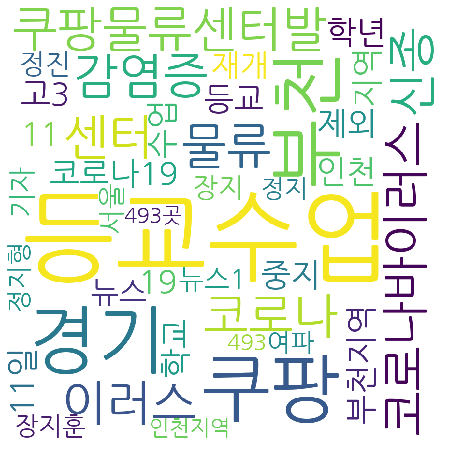

In [26]:
import matplotlib.pyplot as plt

# font깨져있다.. 
wc = WordCloud(font_path='NanumGothic', background_color ='white', width = 900, height = 900)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()